In [169]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [170]:
actions = [

    'not_stretching'
    ,'stretching'

]

data = np.concatenate([
#     np.load('dataset_TEST/seq_stand_1681377777.npy'),
#     np.load('dataset_TEST/seq_down_1681377777.npy')
    np.load('dataset_TEST/seq_not_stretching123_1682187496.npy')
    ,np.load('dataset_TEST/seq_stretching123_1682188272.npy') 
    
    
], axis=0)

data.shape

(843, 30, 156)

In [171]:
x_data = data[:, :, :-1] #라벨값을 뺀 데이터셋을 만듦
labels = data[:, 0, -1] #라벨만 따로 만듦

print(x_data.shape)
print(labels.shape)

(843, 30, 155)
(843,)


In [172]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(843, 2)

In [173]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(758, 30, 155) (758, 2)
(85, 30, 155) (85, 2)


In [174]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 64)                56320     
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dense_37 (Dense)            (None, 2)                 66        
                                                                 
Total params: 58,466
Trainable params: 58,466
Non-trainable params: 0
_________________________________________________________________


In [175]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    callbacks=[
        ModelCheckpoint('models_TEST/model_TEST1.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/50
22/24 [==========================>...] - ETA: 0s - loss: 29.1050 - acc: 0.4872
Epoch 1: val_acc improved from -inf to 0.68235, saving model to models_TEST\model_TEST1.h5
24/24 [==============================] - 3s 35ms/step - loss: 27.4737 - acc: 0.4921 - val_loss: 4.5243 - val_acc: 0.6824 - lr: 0.0010
Epoch 2/50
24/24 [==============================] - ETA: 0s - loss: 1.4119 - acc: 0.8061
Epoch 2: val_acc improved from 0.68235 to 0.90588, saving model to models_TEST\model_TEST1.h5
24/24 [==============================] - 1s 27ms/step - loss: 1.4119 - acc: 0.8061 - val_loss: 0.2772 - val_acc: 0.9059 - lr: 0.0010
Epoch 3/50
23/24 [===========================>..] - ETA: 0s - loss: 8.8887 - acc: 0.7609
Epoch 3: val_acc did not improve from 0.90588
24/24 [==============================] - 1s 25ms/step - loss: 8.9273 - acc: 0.7546 - val_loss: 6.9880 - val_acc: 0.7176 - lr: 0.0010
Epoch 4/50
24/24 [==============================] - ETA: 0s - loss: 1.4265 - acc: 0.8074
Epoch 4: val

Epoch 31/50
22/24 [==========================>...] - ETA: 0s - loss: 0.0429 - acc: 0.9886
Epoch 31: val_acc did not improve from 0.98824
24/24 [==============================] - 0s 21ms/step - loss: 0.0425 - acc: 0.9881 - val_loss: 0.0215 - val_acc: 0.9882 - lr: 0.0010
Epoch 32/50
22/24 [==========================>...] - ETA: 0s - loss: 0.0380 - acc: 0.9886
Epoch 32: val_acc did not improve from 0.98824
24/24 [==============================] - 0s 21ms/step - loss: 0.0430 - acc: 0.9881 - val_loss: 0.0203 - val_acc: 0.9882 - lr: 0.0010
Epoch 33/50
22/24 [==========================>...] - ETA: 0s - loss: 0.0427 - acc: 0.9872
Epoch 33: val_acc did not improve from 0.98824
24/24 [==============================] - 1s 23ms/step - loss: 0.0416 - acc: 0.9868 - val_loss: 0.0207 - val_acc: 0.9882 - lr: 0.0010
Epoch 34/50
22/24 [==========================>...] - ETA: 0s - loss: 0.0288 - acc: 0.9915
Epoch 34: val_acc did not improve from 0.98824
24/24 [==============================] - 1s 22ms/step

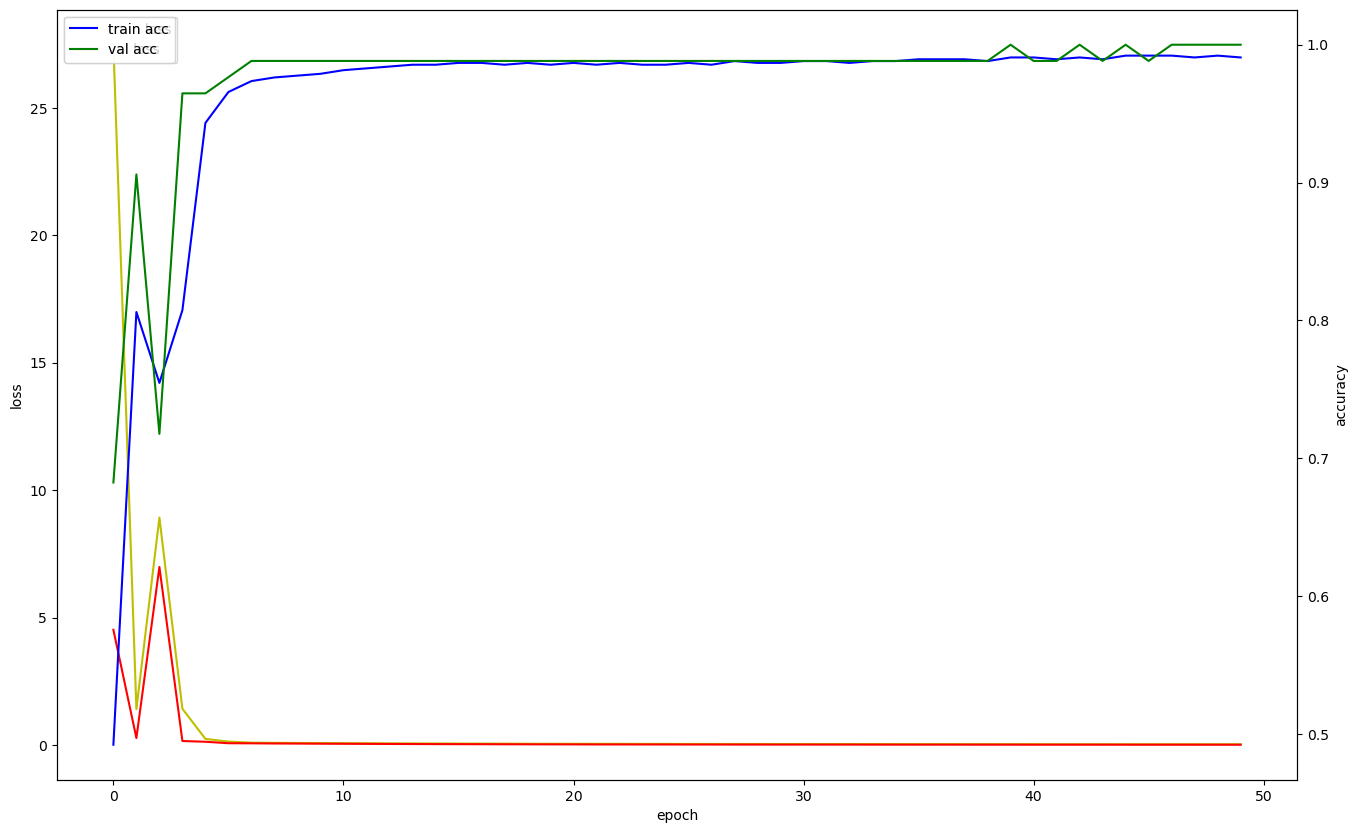

In [176]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [177]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models_TEST/model_TEST3.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

3/3 [==============================] - 0s 9ms/step


array([[[36,  0],
        [10, 39]],

       [[44,  5],
        [17, 19]],

       [[63, 22],
        [ 0,  0]]], dtype=int64)